## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 72m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [4]:
df = pd.read_csv("/content/aptos.csv")

print(df)

     metros  valor  quartos  vagas  reformado          bairro
0       107  560.0        3      2        0.0  Vila Lusitania
1       107  555.0        3      2        1.0  Vila Lusitania
2        49  196.0        2      1        0.0    Ferrazopolis
3       104  515.0        3      2        1.0          Centro
4        92  560.0        3      2        1.0  Vila Lusitania
..      ...    ...      ...    ...        ...             ...
109      65  340.0        2      2        1.0          Centro
110      56  247.0        2      1        0.0        Planalto
111     126  736.0        3      3        0.0           Iraja
112      96  560.0        3      1        0.0          Centro
113     103  667.0        3      3        0.0     Baeta Neves

[114 rows x 6 columns]


In [ ]:
df.head(15)

,metros,valor,quartos,vagas,reformado,bairro
0,107,560.0,3,2,0.0,Vila Lusitania
1,107,555.0,3,2,1.0,Vila Lusitania
2,49,196.0,2,1,0.0,Ferrazopolis
3,104,515.0,3,2,1.0,Centro
4,92,560.0,3,2,1.0,Vila Lusitania
5,51,249.0,2,1,0.0,Taboao
6,140,635.0,4,3,1.0,Centro
7,50,210.0,2,1,1.0,Demarchi
8,93,450.0,3,2,0.0,Baeta Neves
9,107,425.0,3,2,1.0,Rudge Ramos


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

-   Metros: Tamanho do apartamento
-   Valor: Valor do apartamento
-   Quartos: Quantidade de quartos no apartamento
-   Vagas: Vagas na garagem disponivel para o dono do apartamento
-   Reformado: Se o apartamento está reformado ou não
-   Bairro: Localização do apartamento

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1.  Talvez a Vila Lusitana tenha a maior média entre os bairros na questão do tamanho dos apartamentos
2.  Acredito que o Centro seja o bairro com tipos de apartamento mais diversos em relação a tamanho e preço.

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

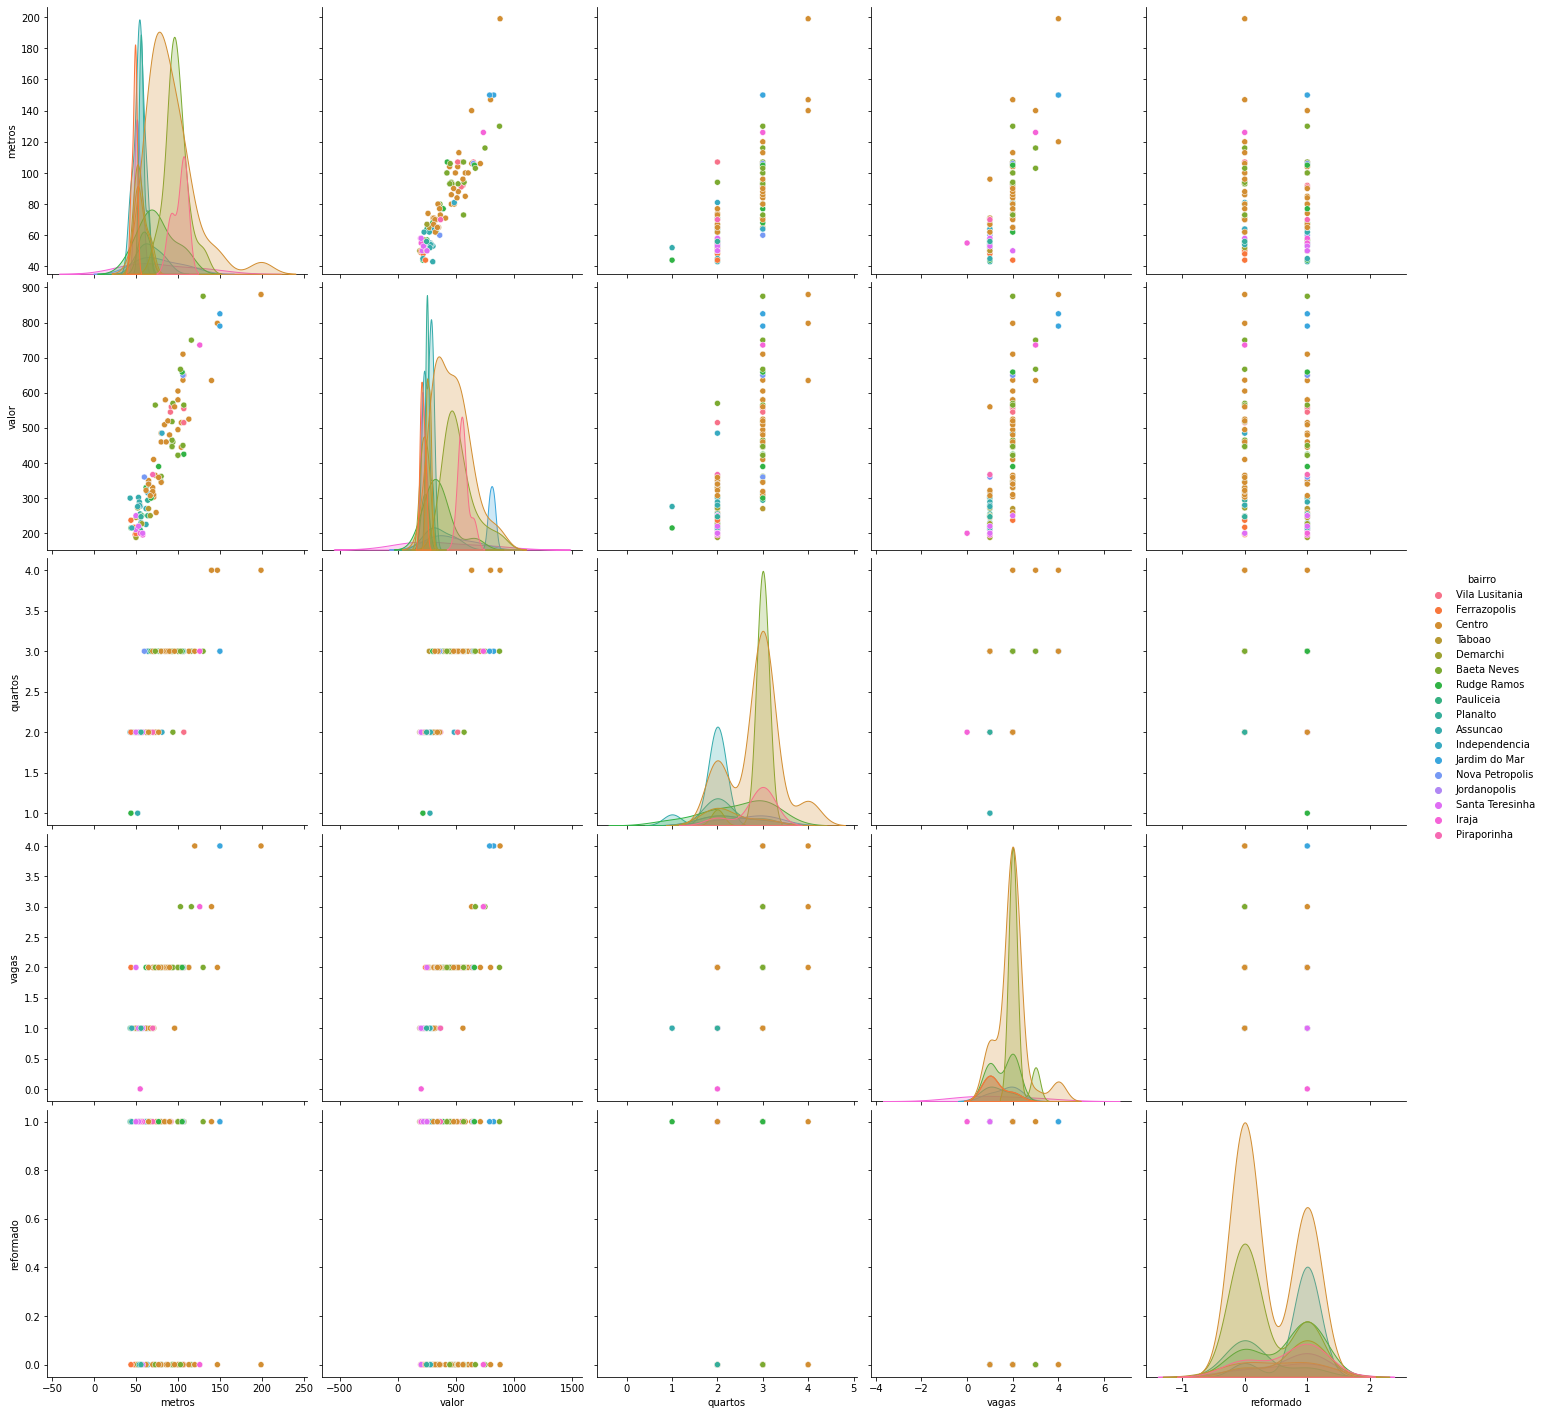

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, hue='bairro', height=4)
plt.show()

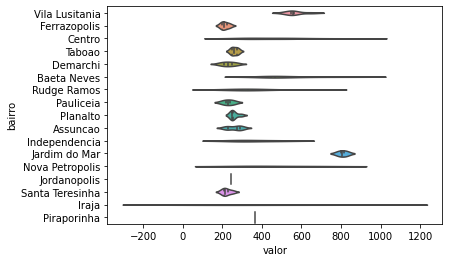

In [ ]:
g = sns.violinplot(y='bairro', x='valor', data=df, inner='quartile')
plt.show()

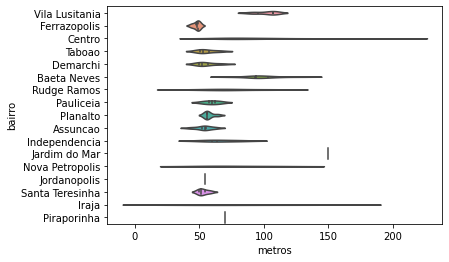

In [ ]:
g = sns.violinplot(y='bairro', x='metros', data=df, inner='quartile')
plt.show()

### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [x] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

    Porque os dados já estão rotuládos 

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [x] Regressão
    [ ] Classificação
    [ ] Clusterização

    Porque é estatístico

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. Regressão Linear
2. Árvores de decisão

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. Tenta buscar relações entre os dados
2. Árvore de decisão ajuda a dividir os dados

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [ ]:
subset = df.loc[:, ['metros', 'quartos', 'valor']]

print(subset)

     metros  quartos  valor
0       107        3  560.0
1       107        3  555.0
2        49        2  196.0
3       104        3  515.0
4        92        3  560.0
..      ...      ...    ...
109      65        2  340.0
110      56        2  247.0
111     126        3  736.0
112      96        3  560.0
113     103        3  667.0

[114 rows x 3 columns]


Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1

In [ ]:
X = df[['metros', 'quartos']]

Y = df['valor']  

print(f"Formato das tabelas de dados {X.shape} e saidas {Y.shape}")

Formato das tabelas de dados (114, 2) e saidas (114,)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2)

print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

(91, 2)
(23, 2)
(91,)
(23,)


In [10]:
X_treino.head()

,metros,quartos
44,56,2
95,88,3
82,86,3
84,52,2
3,104,3


In [11]:
Y_treino.head()

44    249.0
95    520.0
82    460.0
84    272.0
3     515.0
Name: valor, dtype: float64

In [15]:
lin_model = LinearRegression()

lin_model.fit(X_treino, Y_treino)

ValueError: ignored

In [16]:
y_teste_predito = lin_model.predict(X_teste)
print("Predição usando regressão, retorna valores continuos: {}".format(y_teste_predito))

AttributeError: ignored

Text(0, 0.5, 'Valor Predito')

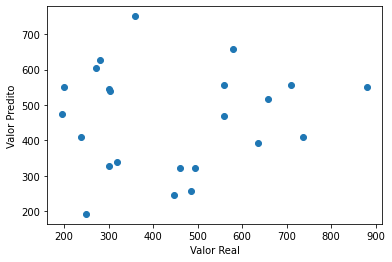

In [ ]:
plt.scatter(Y_teste,y_teste_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_teste_predito - Y_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(Y_teste, y_teste_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(Y_teste, y_teste_predito))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(Y_teste, y_teste_predito)))
print("R2-score: %.2f" % r2_score(y_teste_predito , Y_teste) )

Soma dos Erros ao Quadrado (SSE): 1524366 
Erro Quadrático Médio (MSE): 66276.77
Erro Médio Absoluto (MAE): 218.37
Raiz do Erro Quadrático Médio (RMSE): 257.44 
R2-score: -2.30


### Algoritmo 2

In [5]:
X = df[['metros', 'quartos']]

Y = df['valor']  

In [17]:
from sklearn.tree import DecisionTreeRegressor

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2)

print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

(91, 2)
(23, 2)
(91,)
(23,)


In [18]:
tree_model = DecisionTreeRegressor()

tree_model.fit(X_treino, Y_treino)

DecisionTreeRegressor()

In [20]:
y_teste_predito = tree_model.predict(X_teste)
print("Predição usando regressão, retorna valores continuos: {}".format(y_teste_predito))

Predição usando regressão, retorna valores continuos: [535.66666667 210.4        278.5        259.         300.
 210.4        551.         217.         251.33333333 535.66666667
 248.         300.         331.5        307.33333333 300.
 473.5        473.5        736.         345.         248.
 413.         525.         200.        ]


Text(0, 0.5, 'Valor Predito')

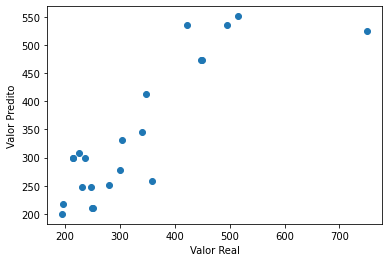

In [21]:
plt.scatter(Y_teste,y_teste_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

In [30]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_teste_predito - Y_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(Y_teste, y_teste_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(Y_teste, y_teste_predito))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(Y_teste, y_teste_predito)))
print("R2-score: %.2f" % r2_score(y_teste_predito , Y_teste) )

Soma dos Erros ao Quadrado (SSE): 113218 


ValueError: ignored

Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino | X | X |
| teste  | X | X |

**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:**

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 72m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [ ]:
#Seu Código aqui...



## 6. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**:

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**:




